# Analyse en composantes principales (PCA)

L'objectif de ce notebook est d'étudier l'une des méthodes de Machine Learning en **apprentissage non supervisé** : **l'analyse en composantes principales - ACP - ou PCA en anglais)**. 

Afin de bien **comprendre les notions sous-jacentes à cette méthode**, nous avez regardé la vidéo suivante : https://www.youtube.com/watch?v=8qw0bNfK4H0

Après avoir défini les concepts de base sur lesquels repose la PCA,nous allons appliquer cette méthode à un jeu de données réelles puis interpréter les résultats en sortie.

## 1. Définitions

(Durée moyenne : 30 min)



1. Définir une méthode d'analyse factorielle

Une méthode d'analyse fatcorielle est une méthode de réduction de données qui fait office d'un modèle de mesure d'une variable latente. Une variable latente ets une variable cachée, qui n'est pas révélée explicitement par le modèle.

La variable latente ne peut pas être mesurée avec une seule variable. Elle est vu au travers des relations entre les variables Y. 

![Image](https://i1.wp.com/www.theanalysisfactor.com/wp-content/uploads/2016/09/KGM_Sept2016_Image2.png?resize=383%2C235)

Dans cette image, F est considéré comme le facteur latent qui cause les réponses b sur les variables Y, accompagnées de leurs erreurs u qui causent un poids sur elles. On peut interpréter ce modèle comme uns et d'équations de régression :

$$
Y = F\, B + U
$$

2. Définir une PCA. Sur quel type de données peut-elle être appliquée? Citer des exemples d'utilisation de la PCA

L'ACP diffère de l'analyse fatcorielle en prenant une combinaison linéaire de variables.

![Image](https://i2.wp.com/www.theanalysisfactor.com/wp-content/uploads/2016/09/KGM_Sept2016_Image1.png?resize=383%2C314)

On combine ici quatre variables Y mesurées en un seul composant C, par leurs poids w. On peut résumer cette image en une équation :

$$
C = w_{1}\, Y_{1} + w_{2}\, Y_{2} + w_{3}\, Y_{3} + w_{4}\, Y_{4}
$$

Elle utilise des jeux de données quantitatives multidimensionnés pour révéler une tendance. On l'utilise en biologie (mesure k pour l'animal i), sciences sociales (temps passé à l'activité k pour les individus de la CSP i), écologie (concentration d'un polluant k dans une rivière i), marketing (valeur d'indice de satisfaction k pour la marque i), etc...

Elle sert pour les algorithmes non-supervisés, dont le datamining.

3. Quelle est la matrice en entrée de l'ACP? Quelle(s) transformation(s) peuvent être appliquées à cette matrice? Justifier

On va centrer nos données par rapport à la moyenne et les réduire par rapport à l'écart-type, donc travailler avec des valeurs standardisées. 

4. Quelle décomposition (ou factorisation) matricielle est utilisée pour l'ACP? Définir l'inertie. Que vaut l'inertie totale lorsque les variables sont centrées et réduites (on parle d'ACP normée)? 

On décompose la matrice en vecteurs propres qui servent à identifier les variables intrinsèques. On utilise l'inertie ou la variance totale de la matrice pour estimer une tendance. La variance totale d'un jeu de données à n composantes est représentée par **une matrice de covariances de taille nxn**. 

L'inertie totale représente la trace de cette matrice, soit la somme des variances de chaque variable. Si les variables sont centrées et réduites, l'écart-type vaut 1, donc la variance vaut 1, et l'inertie totale vaut n.

5. Définir une composante principale. Quelles sont ses propriétés?

Une composante principale est un axe de direction sur lesquelles les données sont alignées. L'objectif de l'ACP est de déterminer ces composantes sur lequelles la variation des donnees est maximale.

L'ACP contredit les méthodes de ML supervisées où on cherche à minimiser la dispersion.

On calcule les valeurs propres sur une matrice de donénes et on détermine les vecteurs propres.

6. Lister des outils d'aide à l'interprétation des résultats

On peut utiliser le module [de Scikit-Learn sur la PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) ou le package FactoMineR sur R, qui contient la focntion `PCA()`.

Pour choisir les axes, on se base sur plusieurs critères :

* Le critère du coude : on regarde où la courbe se plie
* Critère de Kaiser : on ne retient que les axes où l'inertie est au-dessus de l'inertie moyenne $I/p$ ($I/p = 1$ en normé)
* Les diagrammes circulaires

## 2. PCA sur un jeu de données réelles

(Durée moyenne : 2 heures)

L’objectif de cette partie est de mettre en pratique à l'aide de Python la méthode ACP sur un jeu de données réel. Nous allons effectuer pas à pas les différentes étapes de calcul en portant une attention particulière à l'interprétation des résultats pour résumer les relations entre les variables et les individus.

Nous allons nous intéresser au jeu de données sur les performances des athlètes de décathlon à 2 compétitions (JO et Décastar en 2004).Ils participent à 10 épreuves (100m, longueur, poids, hauteur, 400m, 110haies,disque, perche, javelot, 1500m).
Pour ces deux compétitions, on dispose, pour chaque athlète présent, de **ses performances à chacune des 10 épreuves** (les épreuves de vitesse sont mesurées en seconde, les autres en mètres), de son **nombre de points** (à chaque épreuve, un athlète gagne des points en fonction de sa performance) et de son **classement final**. 

L'objectif de l'ACP sur ce jeu de données est de répondre à différentes questions :
- Etude des individus (i.e. des athlètes) :  Y a-t-il des similarités entre les individus pour toutes les variables ? Peut-on établir des profils d'athlètes ? Peut-on opposer un groupe d'individus à un autre ?

- Etude des variables (i.e. des performances) : on étudie les liaisons linéaires entre les variables. Les objectifs sont de résumer la matrice des corrélations et de chercher des variables synthétiques: peut-on résumer les performances des athlètes par un petit nombre de variables ?

- Lien entre les deux études : peut-on caractériser des groupes d'individus par des variables ?

1. Charger le fichier de données et afficher sa dimension

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("Donnees_decathlon.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Sebrle to BOURGUIGNON
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   100m         41 non-null     float64
 1   Long         41 non-null     float64
 2   Poids        41 non-null     float64
 3   Haut         41 non-null     float64
 4   400m         41 non-null     float64
 5   110m.haies   41 non-null     float64
 6   Disque       41 non-null     float64
 7   Perche       41 non-null     float64
 8   Javelot      41 non-null     float64
 9   1500m        41 non-null     float64
 10  Classement   41 non-null     int64  
 11  NbPoints     41 non-null     int64  
 12  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 4.5+ KB


2. Etude exploratoire des variables

Afficher le type des variables. Afficher les statistiques descriptives de chaque variable. Analyser les boxplot des variables quantitatives. Construire la matrice des corrélations entre les variables quantitatives avec la librairie `seaborn`. Interpréter les résultats

In [5]:
#Statistiques descriptives de chaque variable
df.describe()

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement,NbPoints
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


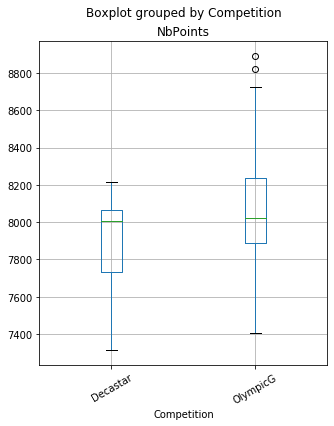

In [10]:
df.boxplot('NbPoints','Competition',rot = 30,figsize=(5,6))

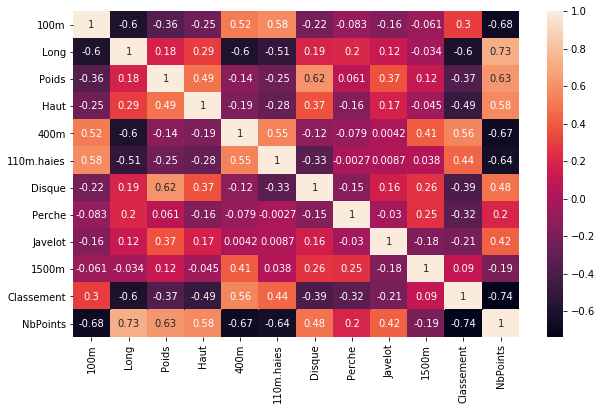

In [19]:
corrMatrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

3. Standardiser (centrer et réduire) les données des 10 épreuves à l'aide de `sklearn.preprocessing.StandardScaler`. On appelera **Z la table en sortie**.
   Contrôler après cette opération la moyenne et la variance de chaque variable.

In [89]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-2]
scaler = StandardScaler()
scaler.fit(X)

Z = scaler.transform(X)
df_Z = pd.DataFrame(Z, columns=df.columns.values[:-2])
df_Z['Competition'] = df['Competition'].values
df_Z.describe() #Moyenne ~= 0 / Ecart-type ~= 0

,100m,Long,Poids,Haut,400m,110m.haies,Disque,Perche,Javelot,1500m,Classement
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,6.590934e-15,-2.274603e-15,-1.635548e-15,-2.003817e-16,-7.305809e-15,-2.783681e-15,-7.311225e-16,-8.854706e-16,2.131087e-15,-2.924490e-15,1.445321e-16
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-2.148030e+00,-2.079872e+00,-2.206861e+00,-1.443554e+00,-2.463221e+00,-1.364493e+00,-1.919918e+00,-2.048297e+00,-1.679377e+00,-1.467898e+00,-1.421921e+00
25%,-5.698664e-01,-7.359546e-01,-7.332243e-01,-6.468231e-01,-6.024251e-01,-8.494714e-01,-7.270147e-01,-9.557533e-01,-6.390196e-01,-6.942645e-01,-7.826800e-01
50%,-6.947300e-02,1.279921e-01,1.141170e-01,-3.053671e-01,-1.898902e-01,-2.700722e-01,2.529382e-02,1.367900e-01,9.106195e-03,-8.455135e-02,-1.434394e-01
75%,5.463958e-01,7.039566e-01,6.053294e-01,7.190008e-01,6.000702e-01,8.028892e-01,5.228365e-01,5.738073e-01,5.397723e-01,5.268964e-01,7.514975e-01
max,2.470986e+00,2.239862e+00,2.312292e+00,1.971006e+00,3.145498e+00,2.283576e+00,2.195299e+00,2.321877e+00,2.559659e+00,3.293589e+00,2.029979e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D60A69D08>,
      dtype=object)

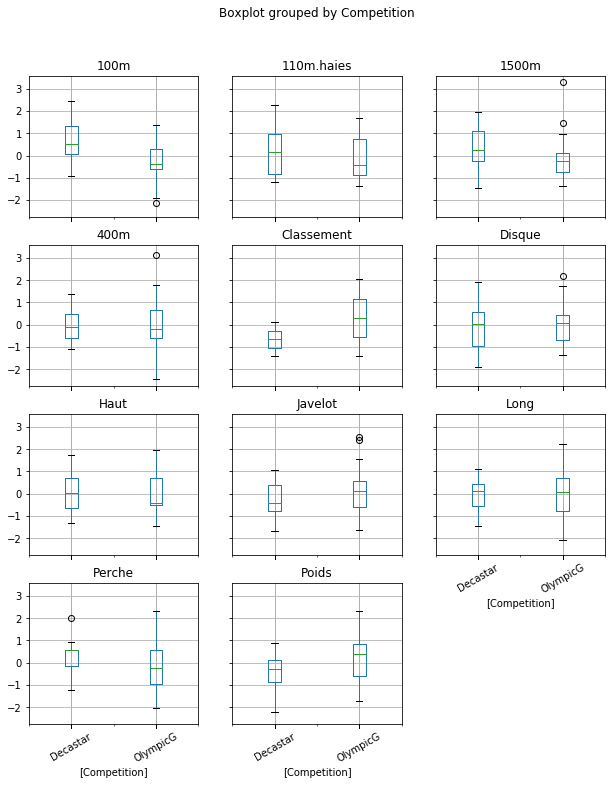

In [49]:
df_Z.boxplot(by='Competition',rot = 30,figsize=(10,12))

4. Afficher la DocString de `sklearn.decomposition.PCA` . Commenter la sortie.
   
   Réaliser la PCA de la matrice Z générée à l'étape précédente. Afficher le nombre par défaut de composantes principales.

In [90]:
import numpy as np
from sklearn.decomposition import PCA
help(PCA)
pca = PCA()
pca.fit(Z)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)



Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Pa

5. Afficher les valeurs propres associées à chaque composante (en nombre, pourcentage, pourcentage cumulé). Tracer le **scree Plot** des valeurs propres cumulées et non cumulées. Interpréter les résultats et sélectionner le nombre de composantes principales à retenir pour cette analyse. 

   **Bonus** : Diagonaliser la matrice de Variance-Covariance de Z et comparer les valeurs propres avec ceux en sortie de `PCA `

Nombre de composants : 11
[[-0.36487302  0.38992698  0.30789697  0.30070242 -0.35793103 -0.36884763
   0.27778045  0.06591664  0.1421425  -0.03657107 -0.40297646]
 [ 0.11904949 -0.25191367  0.46439239  0.27297724  0.42005245  0.15488887
   0.46937846 -0.15277415  0.24385213  0.35590139  0.04437902]
 [-0.11267772  0.13826628 -0.02434085 -0.21701624  0.12777315 -0.04266229
   0.02637874  0.60946804 -0.31455526  0.65280115 -0.07148504]
 [ 0.18599699  0.03596387  0.12638486 -0.03787267  0.04505719  0.36405225
  -0.23405979  0.53735106  0.58513136 -0.21007036 -0.28653384]
 [ 0.557715   -0.06603144 -0.09079162  0.42695384 -0.06935609  0.11694086
   0.10504391  0.09682495 -0.49714214 -0.11257224 -0.44197691]
 [ 0.24027544 -0.27294019  0.18270812 -0.65124351 -0.2737424  -0.14640492
   0.50195391  0.10176787 -0.03685976 -0.20845985 -0.08229896]
 [-0.25023514 -0.45650881  0.52610839  0.20098286 -0.10603269 -0.05753908
  -0.28003268  0.3119865  -0.31114528 -0.24513477  0.25414157]
 [ 0.20515429 -

[Text(0, 0.5, '% cumulé de la variance expliquée'),
 Text(0.5, 0, 'Composante principale'),
 Text(0.5, 1.0, 'PCA Scree Plot')]

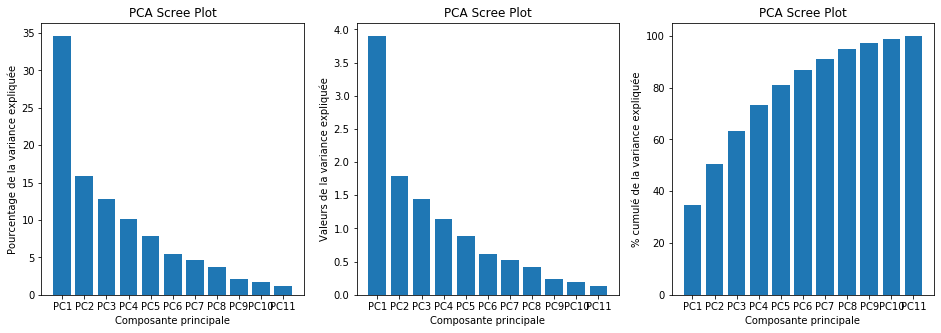

In [140]:
pcs = pca.components_

print("Nombre de composants :", pca.n_components_)
print(pcs)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

fig, ax = plt.subplots(1,3, figsize=(16,5))

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f'PC{i}' for i in range(1,pca.explained_variance_ratio_.size+1)]
ax[0].bar(x= range(1,pca.explained_variance_ratio_.size+1), height=percent_variance, tick_label=columns)
ax[0].set(title='PCA Scree Plot', ylabel='Pourcentage de la variance expliquée', xlabel='Composante principale')

ax[1].bar(x= range(1,pca.explained_variance_.size+1), height=pca.explained_variance_, tick_label=columns)
ax[1].set(title='PCA Scree Plot', ylabel='Valeurs de la variance expliquée', xlabel='Composante principale')

ax[2].bar(x= range(1,pca.explained_variance_.size+1), height=np.cumsum(pca.explained_variance_ratio_*100), tick_label=columns)
ax[2].set(title='PCA Scree Plot', ylabel='% cumulé de la variance expliquée', xlabel='Composante principale')


6. Refaire la PCA en fixant le nombre de composantes à celui retenu à l'étape précédente. Créer un DataFrame contenant les composantes principales.


In [144]:
pca2 = PCA(n_components=2)

pca2.fit(Z)

Z_transform = pca2.fit_transform(Z)

print("Composantes / Vecteurs propres :")
print(pca2.components_)
print("Valeurs propres :")
print(pca2.explained_variance_)

pca_df = pd.DataFrame(pca2.components_.T, columns=['PC1', 'PC2'])
pca_df

Composantes / Vecteurs propres :
[[-0.36487302  0.38992698  0.30789697  0.30070242 -0.35793103 -0.36884763
   0.27778045  0.06591664  0.1421425  -0.03657107 -0.40297646]
 [ 0.11904949 -0.25191367  0.46439239  0.27297724  0.42005245  0.15488887
   0.46937846 -0.15277415  0.24385213  0.35590139  0.04437902]]
Valeurs propres :
[3.90209517 1.78364641]


,PC1,PC2
0,-0.364873,0.119049
1,0.389927,-0.251914
2,0.307897,0.464392
3,0.300702,0.272977
4,-0.357931,0.420052
5,-0.368848,0.154889
6,0.277780,0.469378
7,0.065917,-0.152774
8,0.142143,0.243852
9,-0.036571,0.355901


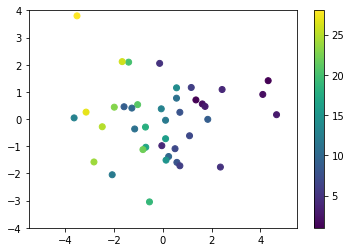

In [74]:
#Colormap
# projeter X sur les composantes principales
X_projected = pca2.transform(Z)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Classement'
    c=df.get('Classement'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

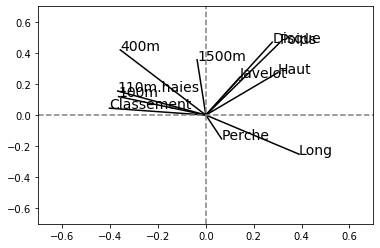

In [72]:
#Diagramme circulaire
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

7. Représenter graphiquement le nuage des individus dans le plan factoriel des deux premières composantes principales. Afficher les noms des athlètes. Que pouvez vous dire de
    - Bourguignon et Karpov ?
    - Barras et Qi ?
    - Casarsa ?
    - Serble et Clay ?

Text(0.5, 1.0, 'Plan factoriel PC1/PC2')

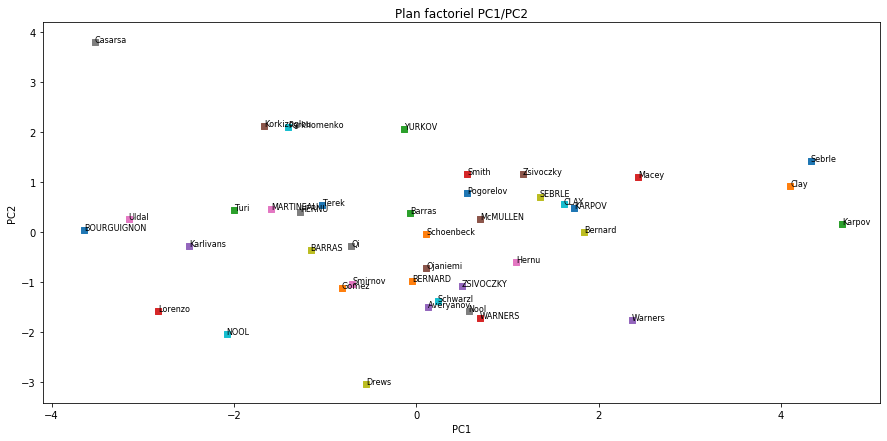

In [146]:

fig=plt.figure(figsize=(15, 7))
for i in range(Z_transform.shape[0]):
    plt.scatter(Z_transform[i,0], Z_transform[i,1], marker="s")
    plt.text(Z_transform[i,0], Z_transform[i,1], df.index[i], fontsize='8')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Plan factoriel PC1/PC2")

* Bourguignon et Karpov sont alignés sur l'axe PC1 mais à l'opposé : Karpov est plus sujet à gagner que Bourguignon
* Barras et Qi sont très proches l'un de l'autre donc ils ont autant de chance de gagner
* Casara est à (-4,4) soit aux extrémités : Il a plus de chances de finir dernier dans la compétition avec un bon score
* Sebrie et Clay sont quasi alignés sur l'horizontale à 1 : Ils font un bon score et sont plus sujets à gagner

8.  Calculer la contribution des individus (athlètes) à l'inertie totale. Pour cela, calculer la somme des carrés des distances à l’origine des individus donnée par : 

Pour un individu i, $d_i^2 = \sum_{j=1}^{10}z_{ij}^2$           

$z_{ij}$ : élément i,j de la matrice Z    

Afficher les résultats pour chaque individu i dans un DataFrame. Interpréter les résultats

In [109]:
df_Z['PC1'] = Z_transform[:,0]
df_Z['PC2'] = Z_transform[:,1]
d = np.sum(Z**2,axis=1) 
df_dist = pd.DataFrame({'Individu': df.index, 'DistanceCarree': d})
df_dist #Plus la distance est grande plus l'individu est performant

,Individu,DistanceCarree
0,Sebrle,25.474299
1,Clay,23.273768
2,Karpov,26.419251
3,Macey,12.869650
4,Warners,9.701595
5,Zsivoczky,7.196304
6,Hernu,3.756569
7,Nool,9.875868
8,Bernard,8.152750
9,Schwarzl,3.957894


9. En déduire de la question précédente,la qualité de représentation de chaque individu ($cos^2$) sur les axes k = 1 et k = 2 via la formule :

$cos_{ik}^2 =\frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {d_i^2}$

Afficher les résultats dans un DataFrame. Commenter 

In [110]:
cos1 = (Z_transform[:,0]**2)/d
cos2 = (Z_transform[:,1]**2)/d
df_cos = pd.DataFrame({'Individu': df.index, 'cos1': cos1, 'cos2': cos2})
df_cos

,Individu,cos1,cos2
0,Sebrle,0.734234,0.078359
1,Clay,0.723479,0.035336
2,Karpov,0.824880,0.000986
3,Macey,0.459820,0.091972
4,Warners,0.575371,0.321201
5,Zsivoczky,0.188849,0.187869
6,Hernu,0.319316,0.100224
7,Nool,0.033542,0.256989
8,Bernard,0.417067,0.000011
9,Schwarzl,0.014136,0.479155


10. Calculer la contribution des individus (CTR) aux axes k = 1 et k = 2

$CTR{ik} = \frac{{coordonnée\,de\,l'individu\,i\,sur\, l'axe\, k}^2} {n*\lambda_k}$

$\lambda_k$ est la valeur propre associée à l'axe 1 et n le nombre d'individus

Afficher les résultats dans un DataFrame. Vérifier que la somme des contributions des individus pour un axe donné vaut 1

In [112]:
ctr1 = (Z_transform[:,0]**2)/(pca2.explained_variance_[0]*df.index.size)
ctr2 = (Z_transform[:,1]**2)/(pca2.explained_variance_[1]*df.index.size)
df_ctr = pd.DataFrame({'Individu': df.index, 'ctr1': ctr1, 'ctr2': ctr2})
df_ctr


,Individu,ctr1,ctr2
0,Sebrle,0.116911,0.027296
1,Clay,0.105247,0.011246
2,Karpov,0.136216,0.000356
3,Macey,0.036989,0.016186
4,Warners,0.034891,0.042612
5,Zsivoczky,0.008495,0.018487
6,Hernu,0.007498,0.005148
7,Nool,0.002071,0.034705
8,Bernard,0.021253,0.000001
9,Schwarzl,0.000350,0.025933


10. on cherche à analyser les variables sur les axes 1 et 2. POur ce faire, afficher les vecteurs propres de la PCA et calculer la racine des valeurs propres des axes 1 et 2

Afficher la matrice de corrélation des variables avec les facteurs. Pour ce faire, calculer les corrélations comme le produit de vecteur propre et la racine de la valeur propre associés à l'axe k (k = 1 et k = 2)

Tracer le nuage des variables dans le cercle des corrélations (afficher le nom des variables) dans le plan factoriel (1,2). Interpréter les résultats.

- Que peut-on dire sur les scores des épreuves du 110m haie et les épreuves du 100m?
- Idem par rapport au saut en longueur ?
- Que peut-on dire sur les scores de l’épreuve du javelot ou du saut à la perche ?

Text(0.5, 1.0, 'Vecteurs propres')

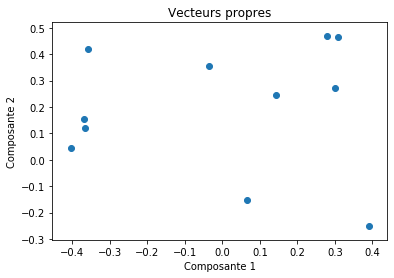

In [118]:
fig=plt.figure(figsize=(15, 7))
plt.scatter(pca2.components_[0,:],pca2.components_[1,:])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Vecteurs propres")

In [119]:
#Racine des valeurs propres
np.sqrt(pca2.explained_variance_)

array([1.97537216, 1.33553226])

In [125]:

pca_corr = pca2.components_*np.tile(np.sqrt(pca2.explained_variance_),(pca2.components_.shape[1],1)).T
pca_corr

array([[-0.72076   ,  0.77025091,  0.6082111 ,  0.59399918, -0.70704699,
        -0.72861134,  0.54871977,  0.13020989,  0.28078434, -0.07224147,
        -0.79602848],
       [ 0.15899443, -0.33643883,  0.62021102,  0.36456991,  0.56099359,
         0.20685908,  0.62687007, -0.20403481,  0.32567239,  0.47531779,
         0.05926962]])

Text(0.5, 0, '-rapide----+rapide')

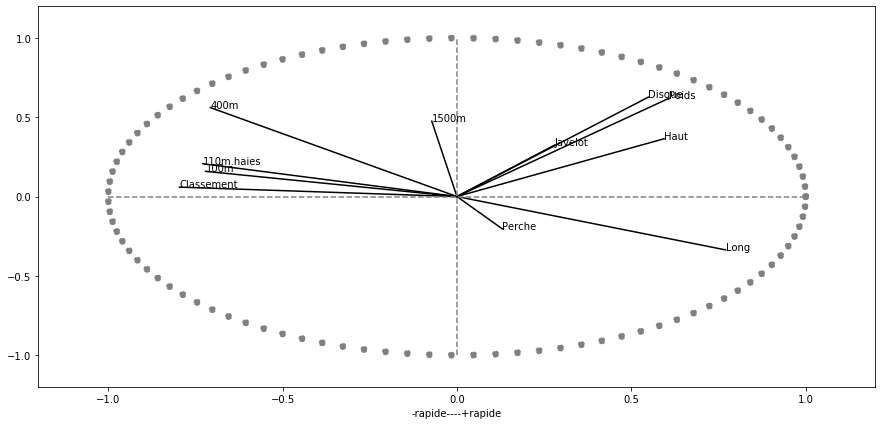

In [147]:
fig=plt.figure(figsize=(15, 7))
for i, (x, y) in enumerate(zip(pca_corr[0, :], pca_corr[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

#Tracer un cercle
plt.scatter(np.cos(np.linspace(0,2*np.pi,100)),np.sin(np.linspace(0,2*np.pi,100)), color='grey', ls='--')

plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.xlabel("-rapide----+rapide")

10. Analyser la qualité de représentation des variables ($Cos^2$) dans le plan factoriel (1,2) ainsi que la contribution de chaque variable aux facteurs k = 1 et k = 2

$ 𝐶𝑂𝑆_{𝑗𝑘}^2={correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2$

$ 𝐶𝑇𝑅_{𝑗𝑘}=\frac{{correlation\,de \,la\, variable\, j \,avec \,l'axe \,k}^2}{\lambda_𝑘}$

Créer un DataFrame avec les résultats et les commenter.

11. interpréter le troisième axe factoriel. Que semble t-il représenter?
Axe 1 vs Axe 3

12. Comment pourrions-nous améliorer notre analyse? (introduction de nouvelles informations par exemple,...)